In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import files
uploaded = files.upload()

Saving rockpaperscissors.zip to rockpaperscissors.zip


In [ ]:
!unzip rockpaperscissors

In [5]:
import zipfile,os

In [101]:
os.listdir('rockpaperscissors')

['README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'scissors', 'paper']

In [102]:
# melakukan pengecekan jumlah file
print (len(os.listdir('rockpaperscissors/rock')))
print (len(os.listdir('rockpaperscissors/paper')))
print (len(os.listdir('rockpaperscissors/scissors')))

726
712
750


In [103]:
# membuat nama directori
base_dir = 'rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [104]:
# membuat direktori untuk setiap klasifikasi
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [105]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [106]:
# memecah direktori rock menjadi data train dan data validation
val_rock_dir, train_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.6)
val_paper_dir, train_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.6)
val_scissors_dir, train_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.6)

In [107]:
len(train_rock_dir)

436

In [108]:
#membuat direktori ruangan rapi pada direktori data training
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

In [109]:
# membuat direktori ruangan rapi pada direktori data validating
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [110]:
# meng copy data train dan data val ke directory baru
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [111]:
print ('jumlah data train rock adalah ',len(os.listdir('rockpaperscissors/train/rock')))
print ('jumlah data train paper adalah ',len(os.listdir('rockpaperscissors/train/paper')))
print ('jumlah data train scissors adalah ',len(os.listdir('rockpaperscissors/train/scissors')))

jumlah data train rock adalah  436
jumlah data train paper adalah  428
jumlah data train scissors adalah  450


In [112]:
#shutil.rmtree('/content/rockpaperscissors/train')
#shutil.rmtree('/content/rockpaperscissors/val')

In [113]:
print ('jumlah data validation rock adalah ',len(os.listdir('rockpaperscissors/val/rock')))
print ('jumlah data validation paper adalah ',len(os.listdir('rockpaperscissors/val/paper')))
print ('jumlah data validation scissors adalah ',len(os.listdir('rockpaperscissors/val/scissors')))

jumlah data validation rock adalah  290
jumlah data validation paper adalah  284
jumlah data validation scissors adalah  300


In [114]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [115]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [116]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [117]:

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [118]:
from datetime import datetime
start_time = datetime.now()


history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/20
25/25 - 44s - loss: 1.0187 - accuracy: 0.4775 - val_loss: 0.8402 - val_accuracy: 0.5750
Epoch 2/20
25/25 - 44s - loss: 0.5894 - accuracy: 0.7750 - val_loss: 0.4293 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 43s - loss: 0.3623 - accuracy: 0.8587 - val_loss: 0.2553 - val_accuracy: 0.8875
Epoch 4/20
25/25 - 42s - loss: 0.2287 - accuracy: 0.9195 - val_loss: 0.2055 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 44s - loss: 0.1910 - accuracy: 0.9375 - val_loss: 0.1679 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 44s - loss: 0.1616 - accuracy: 0.9438 - val_loss: 0.2960 - val_accuracy: 0.8750
Epoch 7/20
25/25 - 44s - loss: 0.2051 - accuracy: 0.9468 - val_loss: 0.1546 - val_accuracy: 0.9750
Epoch 8/20
25/25 - 44s - loss: 0.1343 - accuracy: 0.9625 - val_loss: 0.1267 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 42s - loss: 0.0912 - accuracy: 0.9714 - val_loss: 0.1364 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 42s - loss: 0.2294 - accuracy: 0.9182 - val_loss: 0.1808 - val_accuracy: 0.9250
Epoch 11/

Text(0.5, 1.0, 'Training and Validation Accuracy')

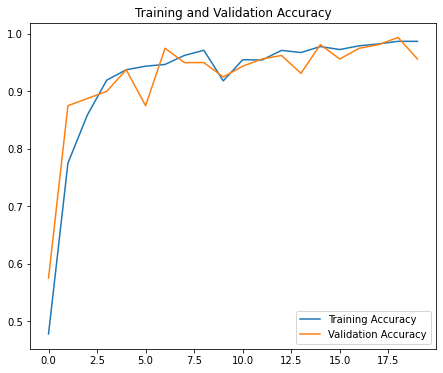

In [119]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

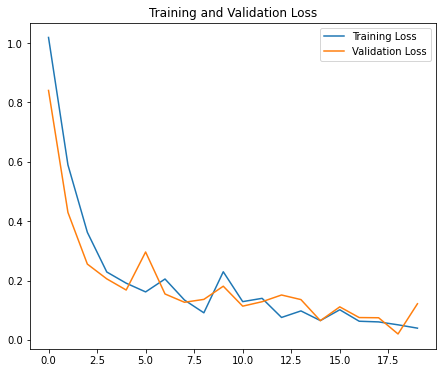

In [120]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving kertas.png to kertas (2).png
kertas.png
rock


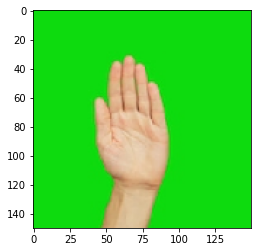

In [121]:

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')